# Slow method vs Faster method

So far, we have been defining the Fourier Transform function using a bunch of for loops. All programmers know that for loops actually slow down your programs. To illustrate how, we should define two identical functions, $ dft1 $(slower function) as it will contain for loops like we have been doing before, and $ dft2 $(faster function because it will contain no for loops. We will time both functions at the same set of numbers and compare how long it takes each function to calculate the $ dft $.

In [2]:
# import the libraries that we may need to use later
import matplotlib.pyplot as plt
import numpy as np
# This should be the slower function
def dft1(y):
    N = len(y)
    c = np.zeros(N, complex)
    for k in range(N):
        for n in range(N):
            c[k] += y[n]*np.exp(-2j*np.pi*k*n/N)
    return c


# This should be the faster function
def dft2(y):
    x = np.asarray(y, dtype = float)
    N = y.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j*np.pi*k*n/N)
    return np.dot(M, x)
# This program is supposed to be faster than what we have been doing before because it does not contain any for loop.

Let us create a set of numbers for which we can time the calculations for both functions.

In [8]:
T = [50, 100, 1000]
print(T)

[50, 100, 1000]


In [9]:
print('Using dtf1, the times it took to calculate are:')
for i in T:
    %timeit dft1(np.random.random(i))
print('Using dft2, the times it took to calculate are:')
for j in T:
    %timeit dft2(np.random.random(j))

Using dtf1, the times it took to calculate are:
8.1 ms ± 44.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
32.1 ms ± 211 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
3.22 s ± 9.67 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Using dft2, the times it took to calculate are:
142 µs ± 309 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
630 µs ± 51.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
73.3 ms ± 2.51 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


As we have seen from the results, the $ dft2 $ comes out to be much, much faster than $ dft1 $ because of the lack of for loops within the function.

# Fast Fourier Transform

There is an even faster method than $ dft2 $. The Numpy library has the function $ fft $, which stands for Fast Fourier Transform. Of course, we should know that the only way for the $ fft $ function to be even faster than $ dft2 $ is through some sort of code optimization, which were methods that the computer scientists who programmed the $ Numpy fft $ had knowledge which may be beyond our understanding because we are amateur programmers compared to them. We will use that function and time it at the same numbers that we evaluated $ dft1 $ and $ dft2 $ and compare the time it took to calculate stuffs.

In [18]:
print('Using the Fast Fourier Transform, the times are:')
for i in T:
    %timeit np.fft.fft(np.random.random(i))

Using the Fast Fourier Transform, the times are:
3.83 µs ± 78.2 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
4.55 µs ± 43.3 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
13.1 µs ± 165 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Looking at these results, this is even way way faster than $ dft2 $ which was already very fast. If we are using extremely large data sets that we want to analyze, every milliseconds, microseconds, or nanoseconds count. We want to use the fastest methods that we can find by avoiding as much for loops as possible. Therefore, we can conclude that $ fft $ is the method we should use from now on.

# Some application

Let us generate some data where we can apply the fft.

ValueError: x and y must have same first dimension, but have shapes (499,) and (1000,)

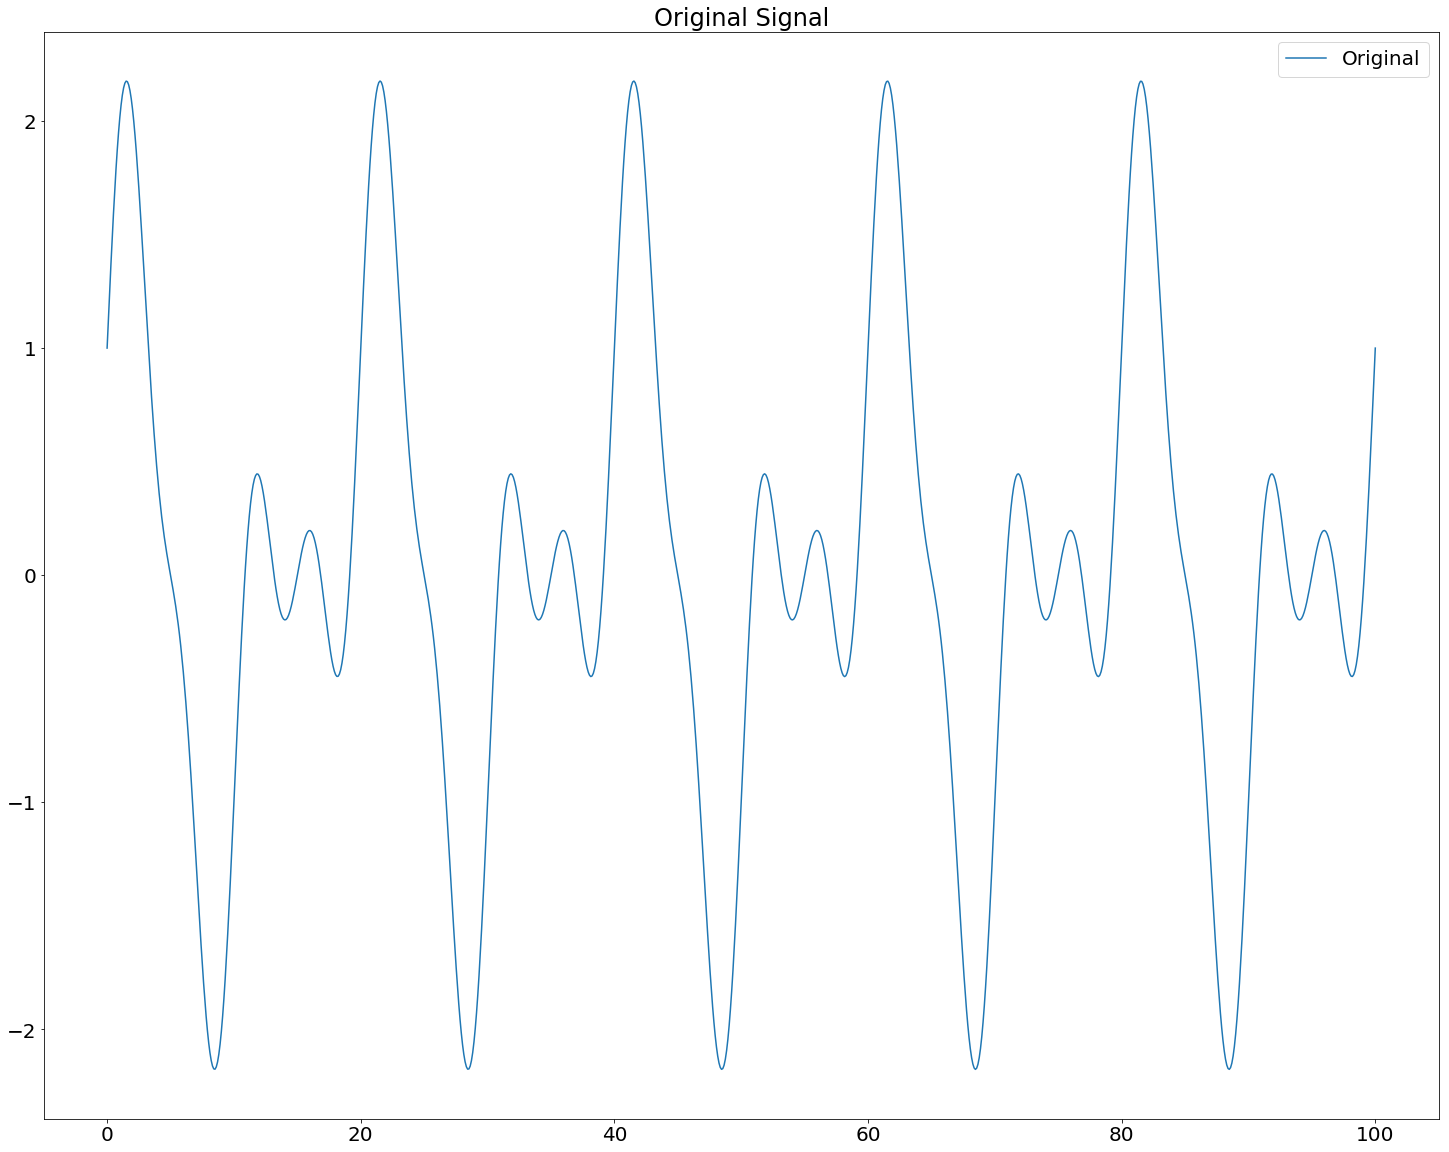

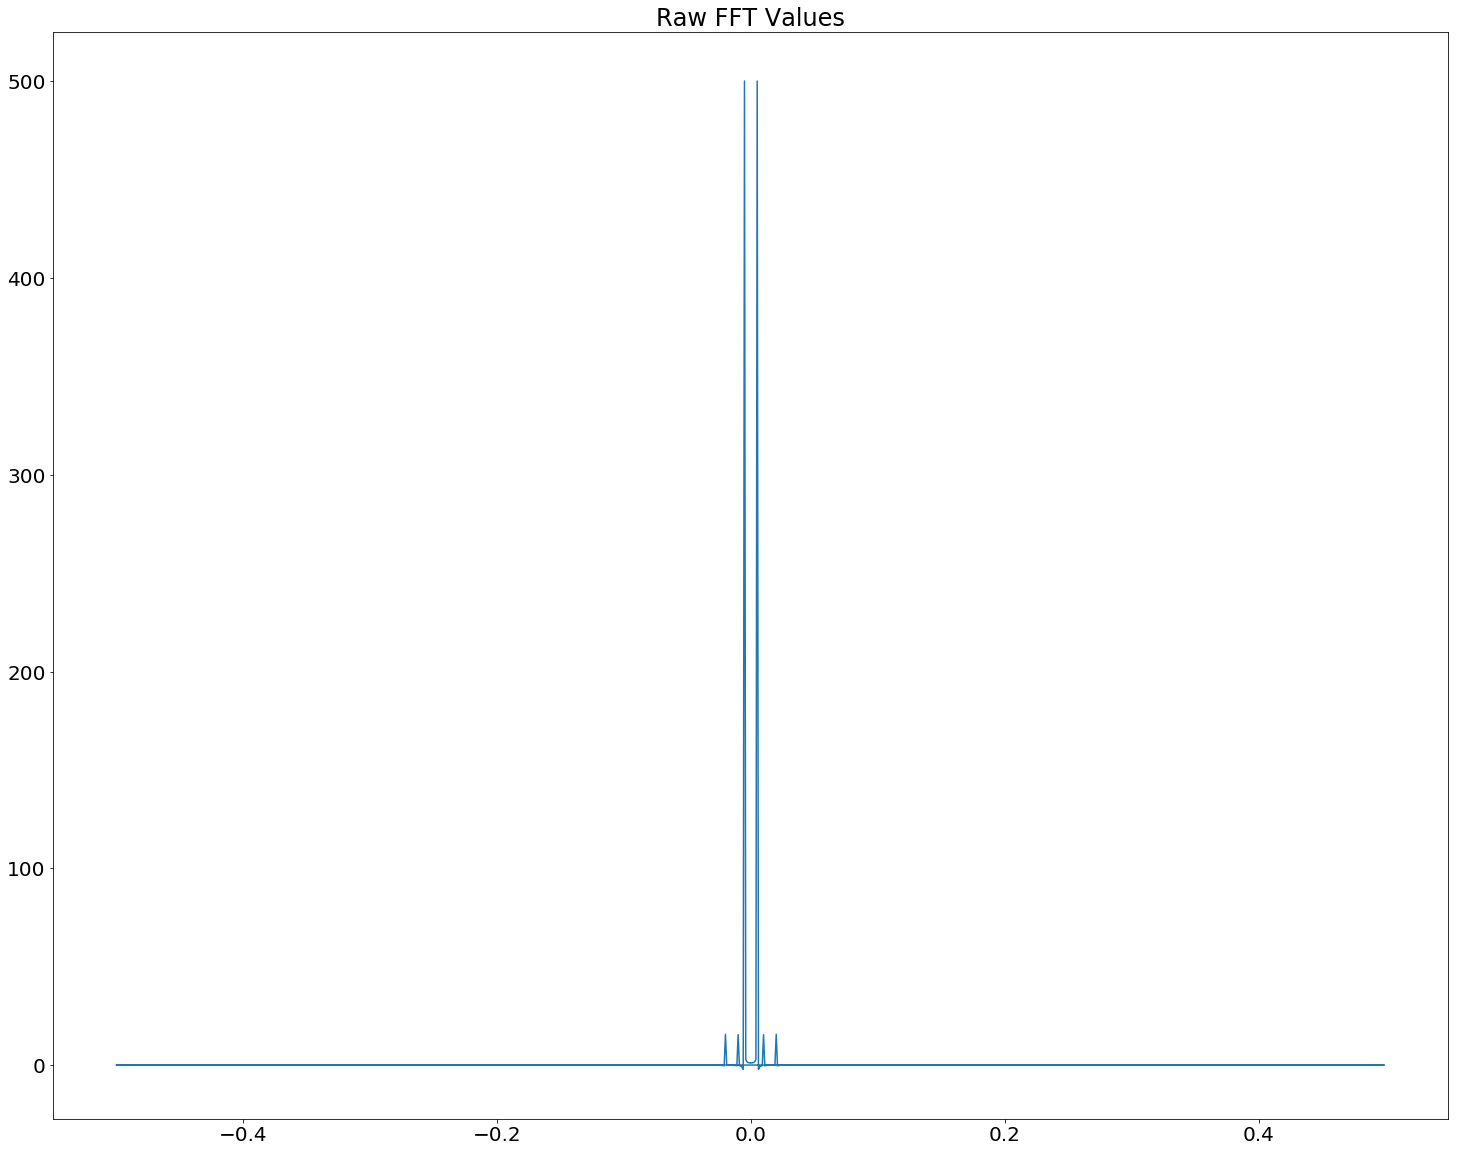

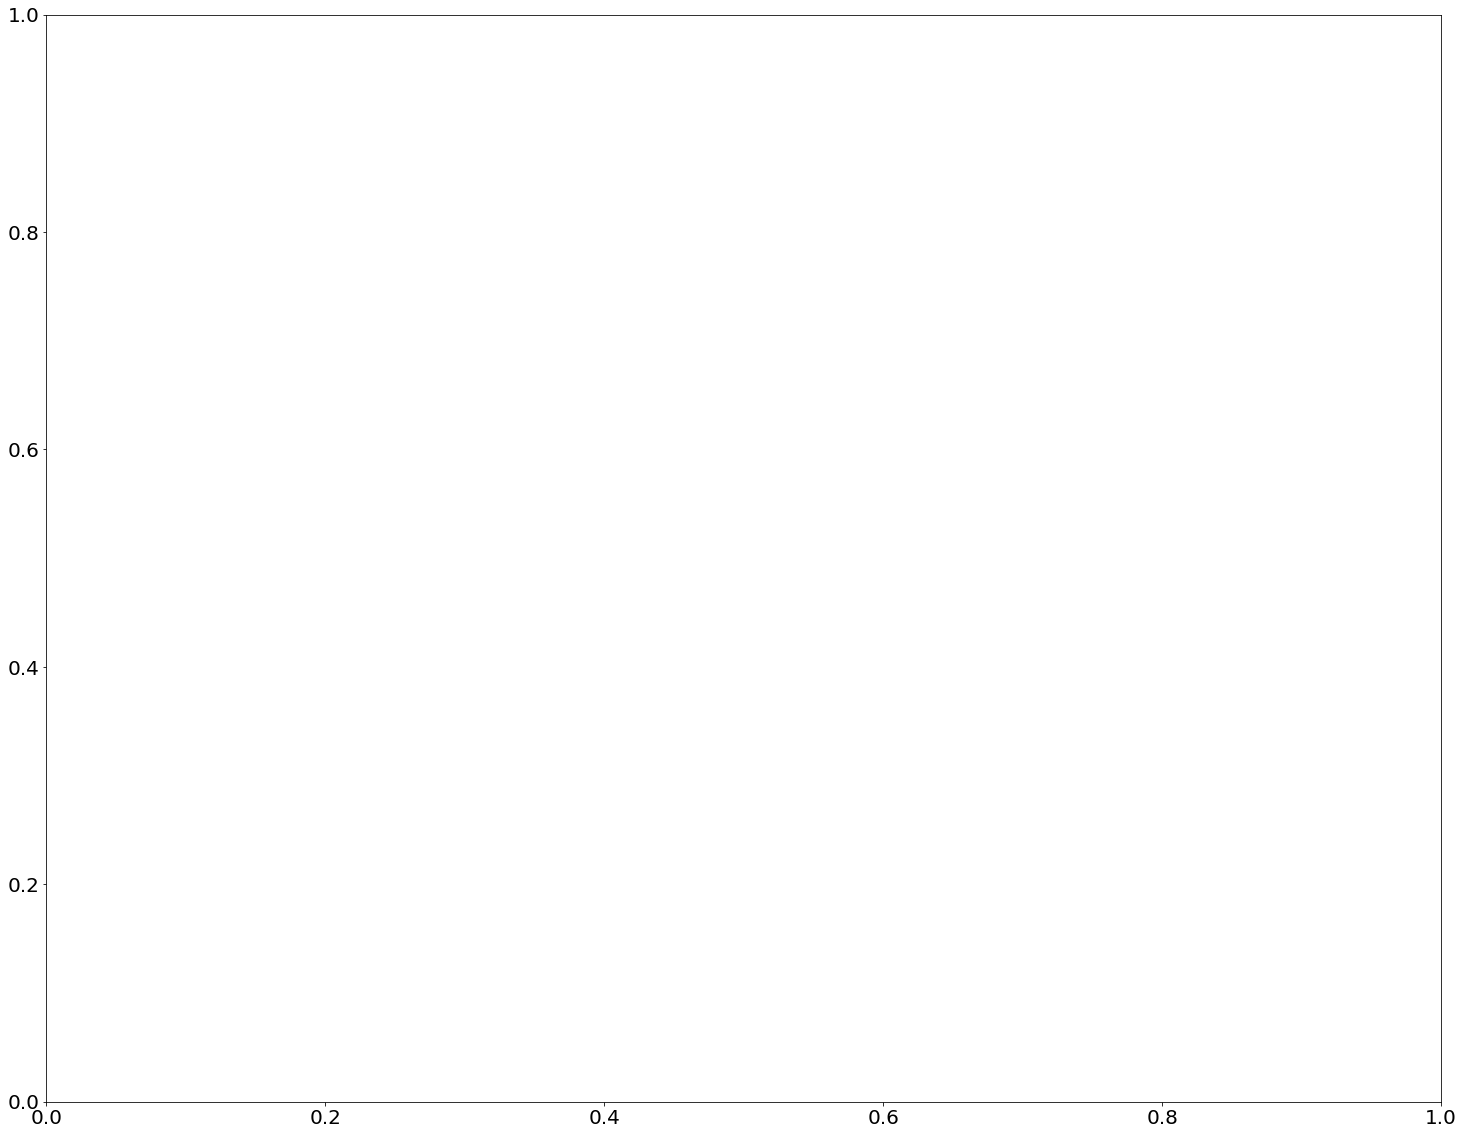

In [22]:
from numpy.fft import fft, fftfreq, ifft

n = 1000 # number of points
L = 100 # time period
omega = 2.0*np.pi/L # angular frequency

x = np.linspace(0, L, n)
y1 = 1.0*np.cos(5.0*omega*x)
y2 = 1.0*np.sin(10.0*omega*x)
y3 = 0.5*np.sin(20.0*omega*x)

y = y1 + y2 + y3 # the signal
Freq = fftfreq(n) # creating the proper frequencies
Mask = Freq > 0 # ignoring negative conjugates
FFT = fft(y)
FFT_True = 2.0*np.abs(FFT/n)
plt.rcParams['figure.figsize'] = (25, 20)
plt.rcParams.update({'font.size': 20})
plt.figure(1)
plt.title('Original Signal')
plt.plot(x, y, label = 'Original')
plt.legend()
plt.figure(2)
plt.plot(Freq, FFT, label = 'Raw Values')
plt.title('Raw FFT Values')
plt.figure(3)
plt.plot(Freq[Mask], FFT_True, label = 'True FFT Values')
plt.title('True FFT Values')
plt.show()